## Lab #10 k Nearest Neighbor and Parzen Window

In [6]:
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from itertools import product, combinations

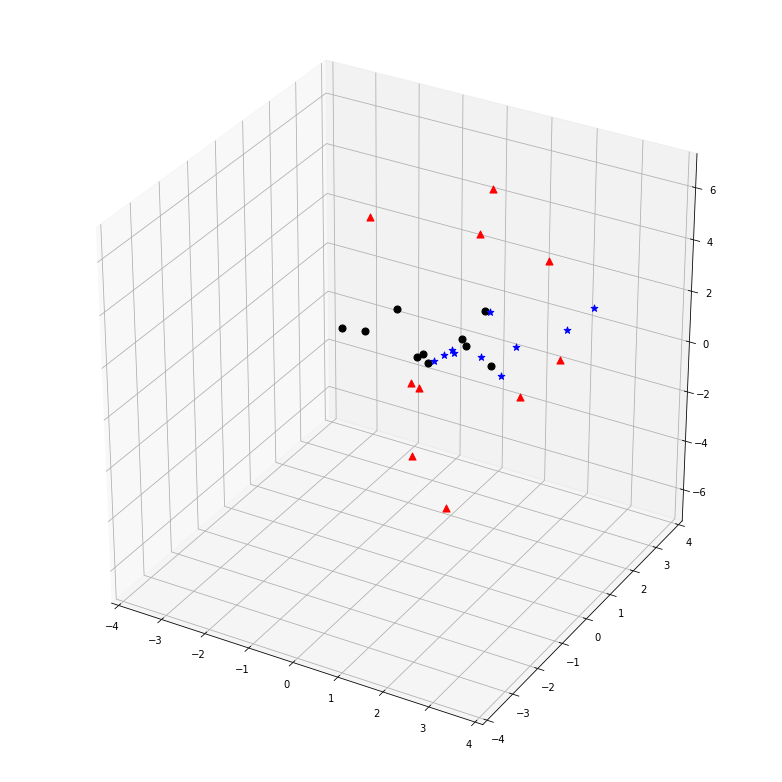

In [7]:
fig = plt.figure(figsize=(14,14))
ax = fig.gca(projection='3d')
ax.set_aspect("equal")

# Plot Points

# samples 
X1 = np.array([[0.28,  1.31,  -6.2],
             [0.07  ,0.58  ,-0.78],
             [1.54  ,2.01  ,-1.63],
            [-0.44  ,1.18  ,-4.32],
            [-0.81  ,0.21  , 5.73],
             [1.52  ,3.16  , 2.77],
             [2.20  ,2.42  ,-0.19],
             [0.91  ,1.94  , 6.21],
             [0.65  ,1.93  , 4.38],
           [ -0.26  ,0.82  ,-0.96]])

X2=np.array([[0.011 , 1.03  ,-0.21],
            [ 1.27 , 1.28  , 0.08],
            [ 0.13 , 3.12  , 0.16],
            [-0.21 , 1.23  ,-0.11],
            [-2.18 , 1.39  ,-0.19],
            [ 0.34 , 1.96  ,-0.16],
            [-1.38 , 0.94  , 0.45],
            [-0.12 , 0.82  , 0.17],
            [-1.44 , 2.31  , 0.14],
            [ 0.26 , 1.94  , 0.08]])

X3=np.array([[ 1.36 , 2.17 , 0.14],
             [1.41 , 1.45 ,-0.38],
             [1.22 , 0.99 , 0.69],
             [2.46 , 2.19 , 1.31],
             [0.68 , 0.79 , 0.87],
             [2.51 , 3.22 , 1.35],
             [0.60 , 2.44 , 0.92],
             [0.64 , 0.13 , 0.97],
             [0.85 , 0.58 , 0.99],
             [0.66 , 0.51 , 0.88]])

for row in X1:
    ax.scatter(row[0], row[1], row[2], color="r", s=50, marker='^')

for row in X2:
    ax.scatter(row[0], row[1], row[2], color="k", s=50)

for row in X3:
    ax.scatter(row[0], row[1], row[2], color="b", s=50, marker='*')

ax.set_xlim(-4, 4)
ax.set_ylim(-4, 4)
ax.set_zlim(-7, 7)

plt.show()

In [8]:
X = np.zeros((10,3,3))
X[:,:,0] = X1
X[:,:,1] = X2
X[:,:,2] = X3

In [9]:
def parzen(w,h,x):
    rows,_,dimension= w.shape
#     print(rows)
    r=np.zeros((dimension))
    for i in range(dimension):
      hn=h
      for j in range(rows):
          hn=hn/np.sqrt(j+1)
          r[i]=r[i]+np.exp( -np.dot((x-w[j,:,i]), (x-w[j,:,i])) / (2*hn**2)) / (np.sqrt(2*np.pi)*hn)
      r[i]=r[i]/rows
    return r


In [10]:
test = np.array([[0.5 , 1,     0],
                 [0.31, 1.51, -0.5],
                 [-0.3, 0.44, -0.1]])

In [11]:
X.shape

(10, 3, 3)

In [19]:
h = 1
for i in range(3):
    r=parzen(X,h,test[i,:])
    result=np.where(r==np.max(r))
    print("The probabilities of point "
          + str(test[i,:])+" belong to three class is " + str(r))
#     print(r)
    print("thus, the point "+str(r)+" is class "+ str(result[0][0]+1))
    print(' ')

The probabilities of point [0.5 1.  0. ] belong to three class is [0.02139395 0.0634711  0.03613364]
thus, the point [0.02139395 0.0634711  0.03613364] is class 2
 
The probabilities of point [ 0.31  1.51 -0.5 ] belong to three class is [0.02074741 0.04829757 0.0316407 ]
thus, the point [0.02074741 0.04829757 0.0316407 ] is class 2
 
The probabilities of point [-0.3   0.44 -0.1 ] belong to three class is [0.03038367 0.03413827 0.0032046 ]
thus, the point [0.03038367 0.03413827 0.0032046 ] is class 2
 


In [20]:
h = 0.1
for i in range(3):
    r=parzen(X,h,test[i,:])
    result=np.where(r==np.max(r))
    print("The probabilities of point "
          + str(test[i,:])+" belong to three class is " + str(r))
#     print(r)
    print("thus, the point "+str(r)+" is class "+ str(result[0][0]+1))
    print(' ')

The probabilities of point [0.5 1.  0. ] belong to three class is [4.34399337e-43 2.69960946e-07 2.45366375e-47]
thus, the point [4.34399337e-43 2.69960946e-07 2.45366375e-47] is class 2
 
The probabilities of point [ 0.31  1.51 -0.5 ] belong to three class is [1.91818447e-44 6.76567745e-10 2.02834556e-43]
thus, the point [1.91818447e-44 6.76567745e-10 2.02834556e-43] is class 2
 
The probabilities of point [-0.3   0.44 -0.1 ] belong to three class is [7.46344916e-028 4.77525554e-011 3.33465184e-127]
thus, the point [7.46344916e-028 4.77525554e-011 3.33465184e-127] is class 2
 
